# ML: Очень простой пример

Здесь Вы научитесь обучать простейшую модель машинного обучения, но пока не научитесь делать ее действительно качественной.

Загрузим датасет

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors

Сначала попробуем поиграться с данными будет всего 2 признака и одна целевая переменная

In [2]:
np.random.seed(123)

In [3]:
classification_problem = datasets.make_classification(
    n_samples=100, 
    n_features=4, 
    n_informative=2, 
    n_classes=3, 
    n_redundant=0,
    n_clusters_per_class=1,
    #random_state=state,
)

In [4]:
def plot_dataset(dataset):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    plt.figure(figsize=(9, 9))
    plt.grid()
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], 
                c=dataset[1], cmap=colors, s=100)
    plt.show()


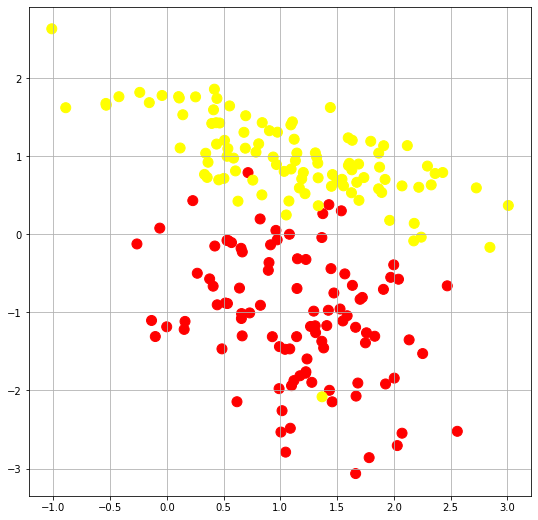

In [8]:
classifcation_problem = datasets.make_classification(
    n_samples=200, 
    n_features=2, 
    n_informative=2, 
    n_classes=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    #random_state=42,
)

plot_dataset(classification_problem)


In [9]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1], 
    test_size=0.3,
    random_state=42,
)

In [10]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier()

In [13]:
test_labels[:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [14]:
predictions[:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [11]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)  # доля правильных ответов

0.9833333333333333

In [15]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [16]:
from  matplotlib import pyplot 

In [17]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap=colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1, 2, 2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=100, cmap=colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

<ipython-input-17-e6a3407a3d4a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
<ipython-input-17-e6a3407a3d4a>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


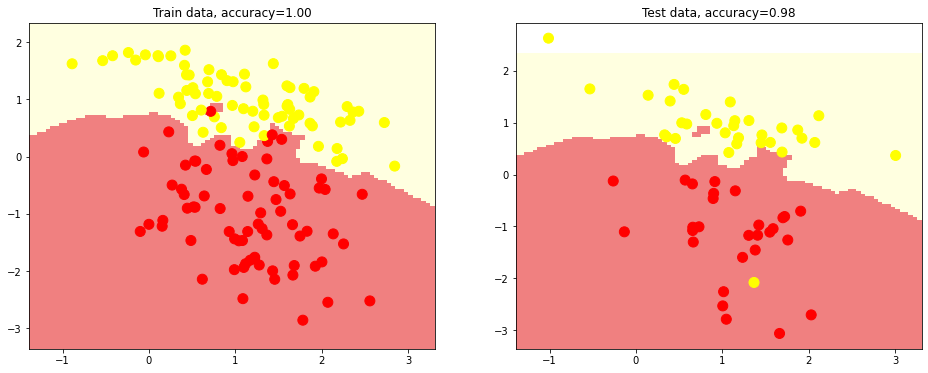

In [18]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

<ipython-input-17-e6a3407a3d4a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
<ipython-input-17-e6a3407a3d4a>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


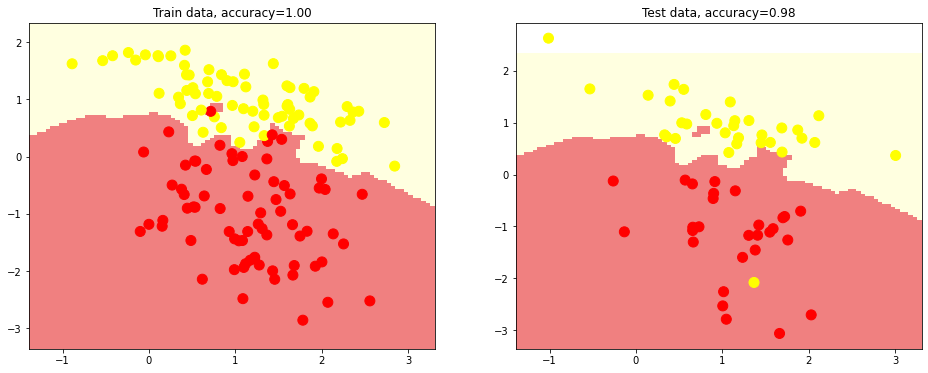

In [20]:
stimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)


<ipython-input-17-e6a3407a3d4a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
<ipython-input-17-e6a3407a3d4a>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)


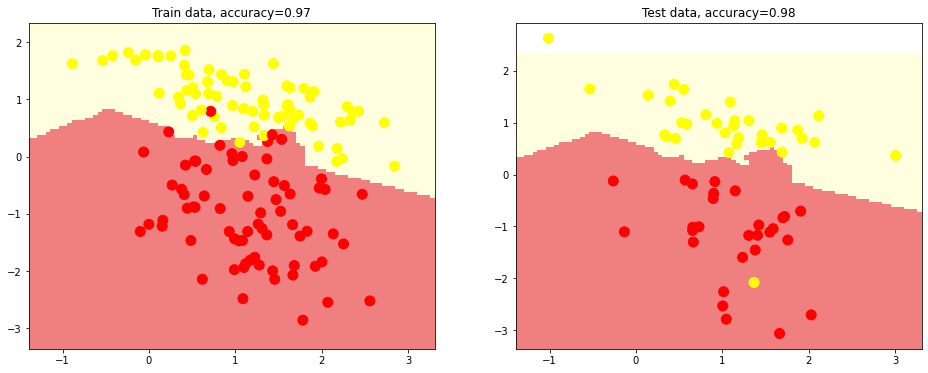

In [21]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
import matplotlib.pyplot as plt

In [22]:
path_to_file = 'https://gist.githubusercontent.com/bigsnarfdude/515849391ad37fe593997fe0db98afaa/raw/f663366d17b7d05de61a145bbce7b2b961b3b07f/weather.csv'
weather = pd.read_csv(path_to_file)

weather

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


Отделим целевую переменную

In [23]:
target = weather['play'].map({'yes': 1, 'no': 0})
print(target)

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play, dtype: int64


Уберем целевую переменную из исходной таблицы, чтобы в ней остались только признаки

In [24]:
weather = weather.drop('play', 1)
weather

,outlook,temperature,humidity,windy
0,overcast,hot,high,False
1,overcast,cool,normal,True
2,overcast,mild,high,True
3,overcast,hot,normal,False
4,rainy,mild,high,False
5,rainy,cool,normal,False
6,rainy,cool,normal,True
7,rainy,mild,normal,False
8,rainy,mild,high,True
9,sunny,hot,high,False


Подготовка признаков: превратим их в цифры

In [25]:
weather['outlook'] = weather['outlook'].map({'rainy': -1, 'overcast': 0, 'sunny': 1})
weather

,outlook,temperature,humidity,windy
0,0,hot,high,False
1,0,cool,normal,True
2,0,mild,high,True
3,0,hot,normal,False
4,-1,mild,high,False
5,-1,cool,normal,False
6,-1,cool,normal,True
7,-1,mild,normal,False
8,-1,mild,high,True
9,1,hot,high,False


**Задание:** сделайте с остальными признаками тоже самое

# ответ

In [26]:
weather['temperature'] = weather['temperature'].map({'cool': -1, 'mild': 0, 'hot': 1})
weather['humidity'] = weather['humidity'].map({'normal': 0,  'high': 1})
weather

,outlook,temperature,humidity,windy
0,0,1,1,False
1,0,-1,0,True
2,0,0,1,True
3,0,1,0,False
4,-1,0,1,False
5,-1,-1,0,False
6,-1,-1,0,True
7,-1,0,0,False
8,-1,0,1,True
9,1,1,1,False


# Теперь нужно разделить выборку на тренировочную и тестовую

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    weather,
    target,
    test_size=0.3
)

In [34]:
X_train = weather[:10]
X_test = weather[10:]
y_train = target[:10]
y_test = target[10:]

X_train

,outlook,temperature,humidity,windy
0,0,1,1,False
1,0,-1,0,True
2,0,0,1,True
3,0,1,0,False
4,-1,0,1,False
5,-1,-1,0,False
6,-1,-1,0,True
7,-1,0,0,False
8,-1,0,1,True
9,1,1,1,False


In [36]:
X_test

,outlook,temperature,humidity,windy
10,1,1,1,True
11,1,0,1,False
12,1,-1,0,False
13,1,0,0,True


# Обучение модели

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=2) # это - модель. Она еще не обучена

knn.fit(X_train, y_train) # это - процесс обучения модели. Теперь модель обучена

predictions = knn.predict(X_test) # делаем предсказания на новых данных

print('predictions:', predictions)
print('y_test:', np.array(y_test))

predictions: [0 0 1 1]
y_test: [0 0 1 1]


**Задание:** как мы уже делали ранее, посчитайте accuracy предсказания.

# ответ


In [39]:
#predictions = clf.predict(test_data)
metrics.accuracy_score(y_test, predictions)

1.0

# .
На будущее: любую модель использовать также просто, как и KNN. Достаточно только изменить название класса. Методы `fit()` и `predict()` у всех моделей работают аналогичным образом.

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier() # это - модель. Она еще не обучена

gb.fit(X_train, y_train) # это - процесс обучения модели. Теперь модель обучена

predictions = gb.predict(X_test) # делаем предсказания на новых данных

print('predictions:', predictions)
print('y_test:', np.array(y_test))

predictions: [0 0 0 0]
y_test: [0 0 1 1]


In [41]:
metrics.accuracy_score(y_test, predictions)

0.5